In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

pd.options.display.max_rows = 25

with open('may_2018_with_counts.pickle','rb') as read_file:
    may18_turnstiles = pickle.load(read_file)
    

In [5]:
may18_turnstiles_daily = may18_turnstiles.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.EXITS.first().reset_index()

In [6]:
may18_turnstiles_daily[["PREV_DATE", "PREV_EXITS"]] = (may18_turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [7]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

In [8]:
may18_turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,04/28/2018,2235829,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/29/2018,2236102,04/28/2018,2235829.0
2,A002,R051,02-00-00,59 ST,04/30/2018,2236301,04/29/2018,2236102.0
3,A002,R051,02-00-00,59 ST,05/01/2018,2236852,04/30/2018,2236301.0
4,A002,R051,02-00-00,59 ST,05/02/2018,2237420,05/01/2018,2236852.0


In [9]:
may18_turnstiles_daily["DAILY_EXITS"] = may18_turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000) 

131 5839138.0
271 8429587.0
9 3474948.0
102 1741200.0
125 2240818.0
681793659 173690.0
681802608 828429.0
1169523 681794193.0
5 100814329.0
122 16892652.0
292 2610495.0
20 16867739.0
700232054 1007667597.0
697578979 700233714.0
563884119 697579254.0
1097 4361781.0
129 1465364.0
142 2123868.0
2425174 215295.0
948 2432714.0
469825533 1893475.0
472 27788529.0
664212057 437.0
725 5453121.0
2246 13433645.0


In [10]:
may18_turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,04/28/2018,2235829,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/29/2018,2236102,04/28/2018,2235829.0,273.0
2,A002,R051,02-00-00,59 ST,04/30/2018,2236301,04/29/2018,2236102.0,199.0
3,A002,R051,02-00-00,59 ST,05/01/2018,2236852,04/30/2018,2236301.0,551.0
4,A002,R051,02-00-00,59 ST,05/02/2018,2237420,05/01/2018,2236852.0,568.0


In [11]:
may18_turnstiles_daily = may18_turnstiles_daily.dropna()
may18_turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,04/29/2018,2236102,04/28/2018,2235829.0,273.0
2,A002,R051,02-00-00,59 ST,04/30/2018,2236301,04/29/2018,2236102.0,199.0
3,A002,R051,02-00-00,59 ST,05/01/2018,2236852,04/30/2018,2236301.0,551.0
4,A002,R051,02-00-00,59 ST,05/02/2018,2237420,05/01/2018,2236852.0,568.0
5,A002,R051,02-00-00,59 ST,05/03/2018,2237975,05/02/2018,2237420.0,555.0


In [12]:
may18_exits_df = may18_turnstiles_daily.groupby(['STATION', 'DATE'])['DAILY_EXITS'].sum().reset_index()
may18_exits_df.head()

,STATION,DATE,DAILY_EXITS
0,1 AV,04/29/2018,23091.0
1,1 AV,04/30/2018,16992.0
2,1 AV,05/01/2018,24414.0
3,1 AV,05/02/2018,23769.0
4,1 AV,05/03/2018,24774.0


In [13]:
first_ave = may18_exits_df[may18_exits_df['STATION']=='1 AV']

In [17]:
first_ave = may18_exits_df[(may18_exits_df['STATION']=='1 AV') | (may18_exits_df['STATION']=='59 ST')]
may18_exits_df


,STATION,DATE,DAILY_EXITS
0,1 AV,04/29/2018,23091.0
1,1 AV,04/30/2018,16992.0
2,1 AV,05/01/2018,24414.0
3,1 AV,05/02/2018,23769.0
4,1 AV,05/03/2018,24774.0
5,1 AV,05/04/2018,25216.0
6,1 AV,05/05/2018,26591.0
7,1 AV,05/06/2018,22717.0
8,1 AV,05/07/2018,15767.0
9,1 AV,05/08/2018,22911.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

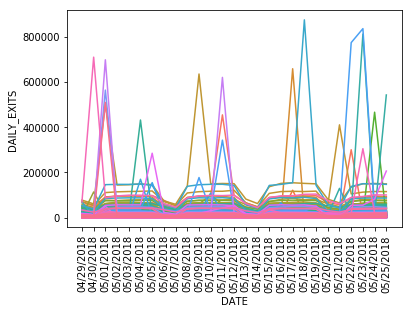

In [16]:
plot = sns.lineplot(x='DATE', y = 'DAILY_EXITS', data=may18_exits_df, hue='STATION', legend=False)
plt.setp(plot.get_xticklabels(), rotation=90)

In [ ]:
#top .01 line graph

In [19]:
#get list of station names for top 1%
may18_turnstiles_daily_exits = may18_turnstiles.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])\
.EXITS.first().reset_index()

In [20]:
may18_turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (may18_turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [21]:
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter

In [22]:
may18_turnstiles_daily_exits["DAILY_EXITS"] = may18_turnstiles_daily_exits.apply(get_daily_counts_exits, axis=1, max_counter=1000000) 

In [23]:
may18_turnstiles_daily_exits = may18_turnstiles_daily_exits.dropna()

In [24]:
may18_exits = may18_turnstiles_daily_exits.groupby('STATION').sum().reset_index()
may18_exits.rename(columns = {'DAILY_EXITS':'TTL_EXITS_MONTH'}, inplace = True)
may18_exits.sort_values('TTL_EXITS_MONTH', ascending = False ).head(10)

,STATION,EXITS,PREV_EXITS,TTL_EXITS_MONTH
59,34 ST-PENN STA,79424797426,7.942232e+10,4190124.0
230,GRD CNTRL-42 ST,58382808240,5.838207e+10,3877164.0
57,34 ST-HERALD SQ,196034417452,1.960322e+11,2989272.0
350,TIMES SQ-42 ST,122877247587,1.228756e+11,2947040.0
255,JOURNAL SQUARE,217766658,2.177572e+08,2694815.0
14,14 ST-UNION SQ,8044988000,8.043095e+09,2613922.0
45,23 ST,200737617514,2.007357e+11,2040807.0
65,42 ST-PORT AUTH,167192064660,1.671903e+11,1892189.0
223,FULTON ST,117828641330,1.178268e+11,1863740.0
107,86 ST,69191000705,6.919774e+10,1738058.0


In [55]:
top_1pcnt_may18_exits = may18_exits['TTL_EXITS_MONTH'].quantile(.99)

In [56]:
top_1pcnt_may18_exits

2760393.4999999977

In [57]:
top_1_may18_exits = may18_exits[may18_exits['TTL_EXITS_MONTH'] > top_1pcnt_may18_exits]

In [58]:
top_5_station_names = top_1_may18_exits['STATION']

In [59]:
top_5_station_names

57     34 ST-HERALD SQ
59      34 ST-PENN STA
230    GRD CNTRL-42 ST
350     TIMES SQ-42 ST
Name: STATION, dtype: object

In [60]:
top_1perc = (may18_exits_df[(may18_exits_df['STATION']=='34 ST-HERALD SQ') | 
                            (may18_exits_df['STATION']=='34 ST-PENN STA')|
                            (may18_exits_df['STATION']=='GRD CNTRL-42 ST')|
                            (may18_exits_df['STATION']=='TIMES SQ-42 ST')])


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

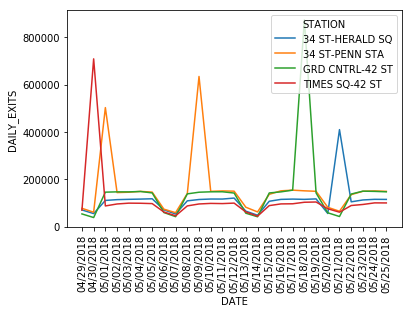

In [62]:
plot = sns.lineplot(x='DATE', y = 'DAILY_EXITS', data=top_1perc, hue='STATION')
plt.setp(plot.get_xticklabels(), rotation=90)

In [ ]:
#top_5pcnt_may18_exits = may18_exits_df['TTL_EXITS_MONTH'].quantile(.99)